# Mouting drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading data

In [5]:
# prompt: reading excel sheet

import pandas as pd
import numpy as np

# Read an Excel file
df = pd.read_excel('/content/drive/MyDrive/galton_height_dataset.xlsx')
df_original = df

# Print the DataFrame
print(df)


    family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
893   136A    68.5    65.0      M    68.5     8     1       0
894   136A    68.5    65.0      M    67.7     8     1       0
895   136A    68.5    65.0      F    64.0     8     0       1
896   136A    68.5    65.0      F    63.5     8     0       1
897   136A    68.5    65.0      F    63.0     8     0       1

[898 rows x 8 columns]


# **Data Preprocessing**

# removing rows having different datatype

In [6]:

# Select rows where the 'FAMILY' column is not of type int
df = df[df['family'].apply(lambda x: isinstance(x, int))]

# Print the DataFrame
print(df)


    family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
885    203    62.0    66.0      M    64.0     3     1       0
886    203    62.0    66.0      F    62.0     3     0       1
887    203    62.0    66.0      F    61.0     3     0       1
888    204    62.5    63.0      M    66.5     2     1       0
889    204    62.5    63.0      F    57.0     2     0       1

[890 rows x 8 columns]


# removing null values

In [7]:
# prompt: generate code to remove null values

df = df.dropna()
print(df)

    family  father  mother gender  height  kids  male  female
0        1    78.5    67.0      M    73.2     4     1       0
1        1    78.5    67.0      F    69.2     4     0       1
2        1    78.5    67.0      F    69.0     4     0       1
3        1    78.5    67.0      F    69.0     4     0       1
4        2    75.5    66.5      M    73.5     4     1       0
..     ...     ...     ...    ...     ...   ...   ...     ...
885    203    62.0    66.0      M    64.0     3     1       0
886    203    62.0    66.0      F    62.0     3     0       1
887    203    62.0    66.0      F    61.0     3     0       1
888    204    62.5    63.0      M    66.5     2     1       0
889    204    62.5    63.0      F    57.0     2     0       1

[890 rows x 8 columns]


# data formating for 'gender'

In [8]:
gender_map = {'M': 1, 'F': 0}
df['gender'] = df['gender'].map(gender_map)
df_original = df


In [ ]:
df.head()

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,1,73.2,4,1,0
1,1,78.5,67.0,0,69.2,4,0,1
2,1,78.5,67.0,0,69.0,4,0,1
3,1,78.5,67.0,0,69.0,4,0,1
4,2,75.5,66.5,1,73.5,4,1,0


# adding additional featue "avg_parent_height"

In [10]:
# Feature engineering: create average parental height
df['avg_parent_height'] = (df['father'] + df['mother']) / 2
print(df)

    family  father  mother  gender  height  kids  male  female  \
0        1    78.5    67.0       1    73.2     4     1       0   
1        1    78.5    67.0       0    69.2     4     0       1   
2        1    78.5    67.0       0    69.0     4     0       1   
3        1    78.5    67.0       0    69.0     4     0       1   
4        2    75.5    66.5       1    73.5     4     1       0   
..     ...     ...     ...     ...     ...   ...   ...     ...   
885    203    62.0    66.0       1    64.0     3     1       0   
886    203    62.0    66.0       0    62.0     3     0       1   
887    203    62.0    66.0       0    61.0     3     0       1   
888    204    62.5    63.0       1    66.5     2     1       0   
889    204    62.5    63.0       0    57.0     2     0       1   

     avg_parent_height  
0                72.75  
1                72.75  
2                72.75  
3                72.75  
4                71.00  
..                 ...  
885              64.00  
886    

# columns present in the dataframe and checking null values

In [11]:
# prompt: generate code to show what are the columns present in the df

# Print the column names of the DataFrame
print(df.columns)


Index(['family', 'father', 'mother', 'gender', 'height', 'kids', 'male',
       'female', 'avg_parent_height'],
      dtype='object')


In [12]:
# prompt: genearate code to know any null values present in the dataframe or not

null_values = df.isnull().sum()
print(null_values)

family               0
father               0
mother               0
gender               0
height               0
kids                 0
male                 0
female               0
avg_parent_height    0
dtype: int64


# **Data Visualisation**

# Distribution of children's height relative to father's height

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = df, x="father", y="height", size ="kids", color = "gender", trendline="ols")
figure.show()


# Distribution of children's height relative to mother's height

In [14]:

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = df, x="mother", y="height", size ="kids", color = "gender", trendline="ols")
figure.show()


# distribution of son's height relative to mother's height

In [16]:
# prompt: distribution od son's height relative to mother's height

figure = px.scatter(data_frame = df[df['gender'] == 1], x="mother", y="height", size ="kids", color_discrete_sequence=["yellow"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# distribution od daughter's height relative to mother's height

In [17]:
# prompt: distribution od daughter's height relative to mother's height

figure = px.scatter(data_frame = df[df['gender'] == 0], x="mother", y="height", size ="kids", color_discrete_sequence=["blue"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# distribution of son's height relative to father's height

In [18]:
# prompt: distribution of son's height relative to father's height

figure = px.scatter(data_frame = df[df['gender'] == 1], x="father", y="height", size ="kids", color_discrete_sequence=["yellow"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# distribution of daughter's height relative to father's height

In [19]:
# prompt: distribution of daughter's height relative to father's height

figure = px.scatter(data_frame = df[df['gender'] == 0], x="father", y="height", size ="kids", color_discrete_sequence=["blue"], trendline="ols")
# Manually change the trendline color
for trace in figure.data:
    if trace.mode == 'lines':  # This is the trendline trace
        trace.line.color = 'red'  # Change this to the color you prefer
figure.show()


# **Correlation coefficients before removing outliers**

# Correlation coefficients of child's height

height               1.000000
avg_parent_height    0.328179
father               0.276801
mother               0.202039
Name: height, dtype: float64


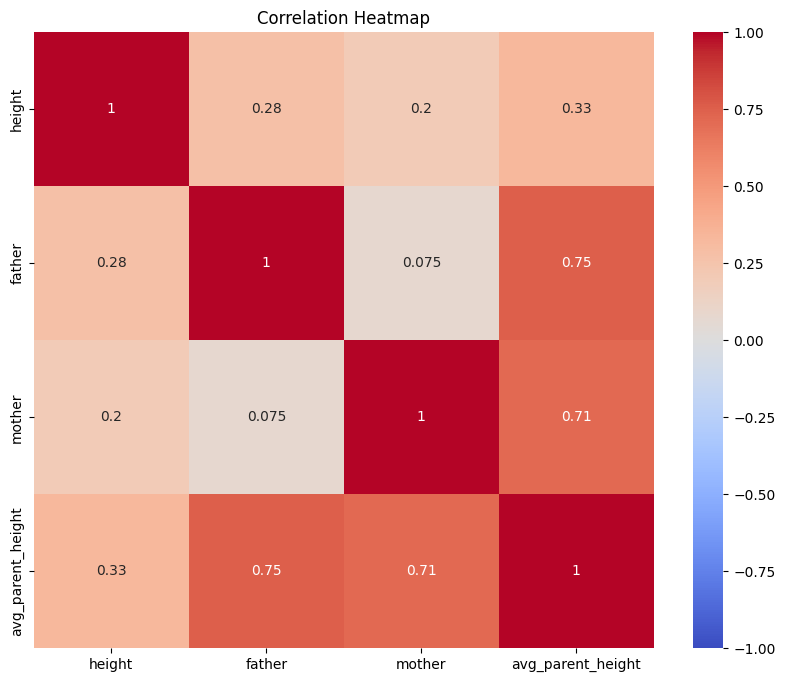

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df[['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height'
print(correlations['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Correlation coefficients of son's height

height               1.000000
avg_parent_height    0.488271
father               0.392561
mother               0.334667
Name: height, dtype: float64


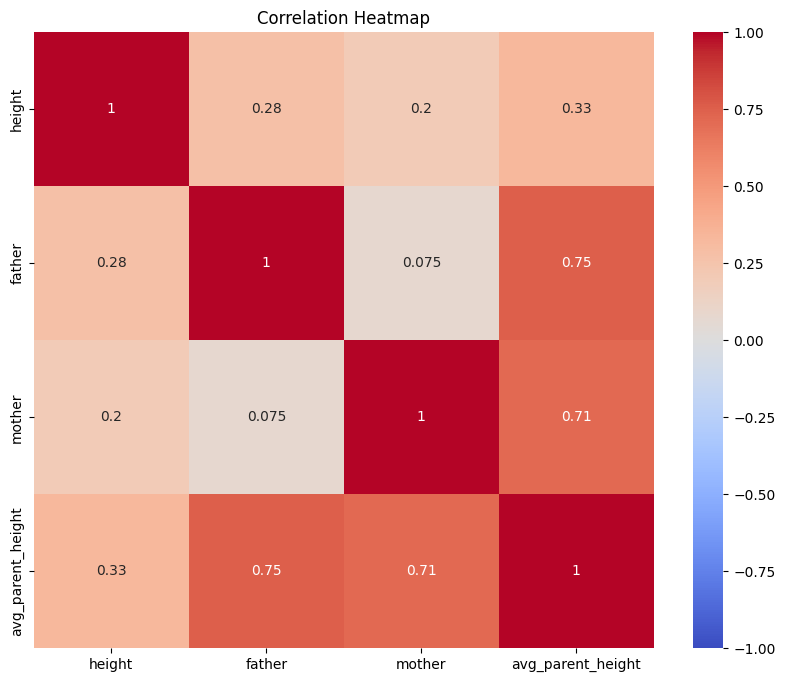

In [21]:
# prompt: Correlation coefficients of son's height

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df[df['gender'] == 1][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Correlation coefficients of daughter's height

height               1.000000
avg_parent_height    0.541610
father               0.458515
mother               0.314607
Name: height, dtype: float64


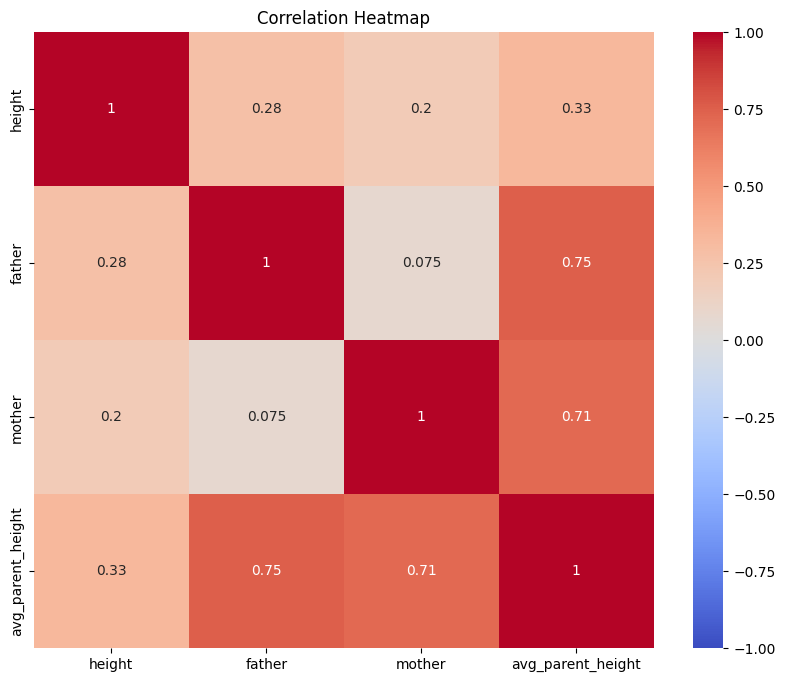

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df[df['gender'] == 0][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# **Removing Outliers**

In [23]:
df_original.describe()

,father,mother,gender,height,kids,male,female,avg_parent_height
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,69.239438,64.076180,0.516854,66.756404,6.119101,0.516854,0.483146,66.657809
std,2.480363,2.315739,0.499997,3.586242,2.691355,0.499997,0.499997,1.758850
min,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000,62.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000,65.500000
50%,69.000000,64.000000,1.000000,66.500000,6.000000,1.000000,0.000000,66.750000
75%,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000,67.500000
max,78.500000,70.500000,1.000000,79.000000,15.000000,1.000000,1.000000,72.750000


# quartile-based outlier removal method

In [24]:
# prompt: generate code for removing outliers based on quartile based outlier removal method

# Define lower and upper bounds
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data based on the bounds
df_filtered = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

# Print the updated DataFrame
print(df_filtered)


    family  father  mother  gender  height  kids  male  female  \
0        1    78.5    67.0       1    73.2     4     1       0   
1        1    78.5    67.0       0    69.2     4     0       1   
2        1    78.5    67.0       0    69.0     4     0       1   
3        1    78.5    67.0       0    69.0     4     0       1   
4        2    75.5    66.5       1    73.5     4     1       0   
..     ...     ...     ...     ...     ...   ...   ...     ...   
885    203    62.0    66.0       1    64.0     3     1       0   
886    203    62.0    66.0       0    62.0     3     0       1   
887    203    62.0    66.0       0    61.0     3     0       1   
888    204    62.5    63.0       1    66.5     2     1       0   
889    204    62.5    63.0       0    57.0     2     0       1   

     avg_parent_height  
0                72.75  
1                72.75  
2                72.75  
3                72.75  
4                71.00  
..                 ...  
885              64.00  
886    

# Dataset before removing outliers

In [25]:

# Print a summary of the dataset, including the count, mean, standard deviation, minimum, and maximum for each column
df.describe()


,father,mother,gender,height,kids,male,female,avg_parent_height
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,69.239438,64.076180,0.516854,66.756404,6.119101,0.516854,0.483146,66.657809
std,2.480363,2.315739,0.499997,3.586242,2.691355,0.499997,0.499997,1.758850
min,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000,62.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000,65.500000
50%,69.000000,64.000000,1.000000,66.500000,6.000000,1.000000,0.000000,66.750000
75%,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000,67.500000
max,78.500000,70.500000,1.000000,79.000000,15.000000,1.000000,1.000000,72.750000


# Dataset after removing Outliers

In [26]:
# prompt: describe about dataset after removing outliers

# Print a summary of the filtered dataset, including the count, mean, standard deviation, minimum, and maximum for each column
df_filtered.describe()


,father,mother,gender,height,kids,male,female,avg_parent_height
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,69.238583,64.075141,0.516310,66.742632,6.118110,0.516310,0.483690,66.656862
std,2.481628,2.316835,0.500015,3.564634,2.692708,0.500015,0.500015,1.759613
min,62.000000,58.000000,0.000000,56.000000,1.000000,0.000000,0.000000,62.000000
25%,68.000000,63.000000,0.000000,64.000000,4.000000,0.000000,0.000000,65.500000
50%,69.000000,64.000000,1.000000,66.500000,6.000000,1.000000,0.000000,66.750000
75%,71.000000,65.500000,1.000000,69.700000,8.000000,1.000000,1.000000,67.500000
max,78.500000,70.500000,1.000000,78.000000,15.000000,1.000000,1.000000,72.750000


In [27]:
if df.shape == df_filtered.shape:
  print("no outliers")
else:
  print("outliers")

outliers


# **Correlation coefficients after removing outliers**

# Correlation coefficients of child's height

height               1.000000
avg_parent_height    0.328544
father               0.277463
mother               0.201852
Name: height, dtype: float64


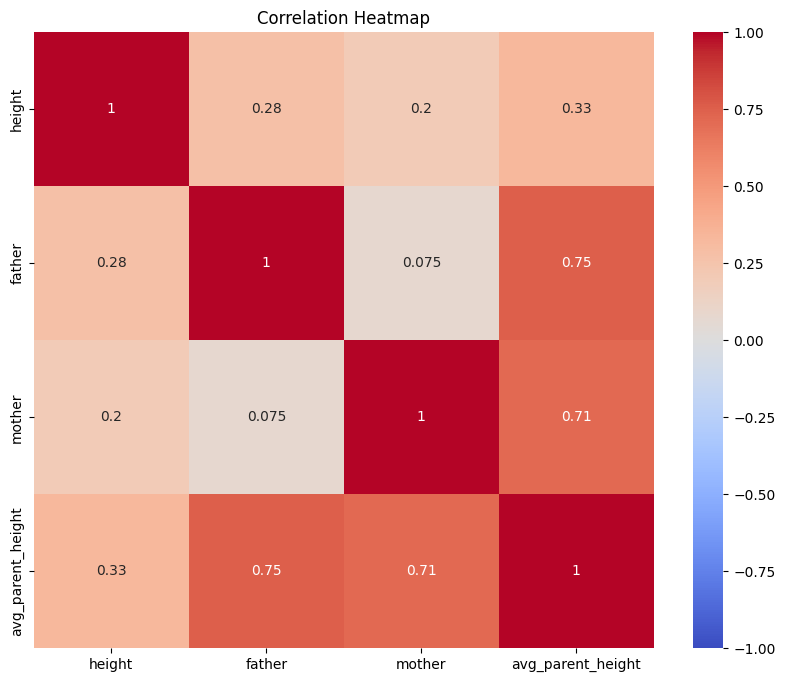

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations
correlations = df_filtered[['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height'
print(correlations['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Correlation coefficients of son's height

height               1.000000
avg_parent_height    0.491557
father               0.395694
mother               0.336336
Name: height, dtype: float64


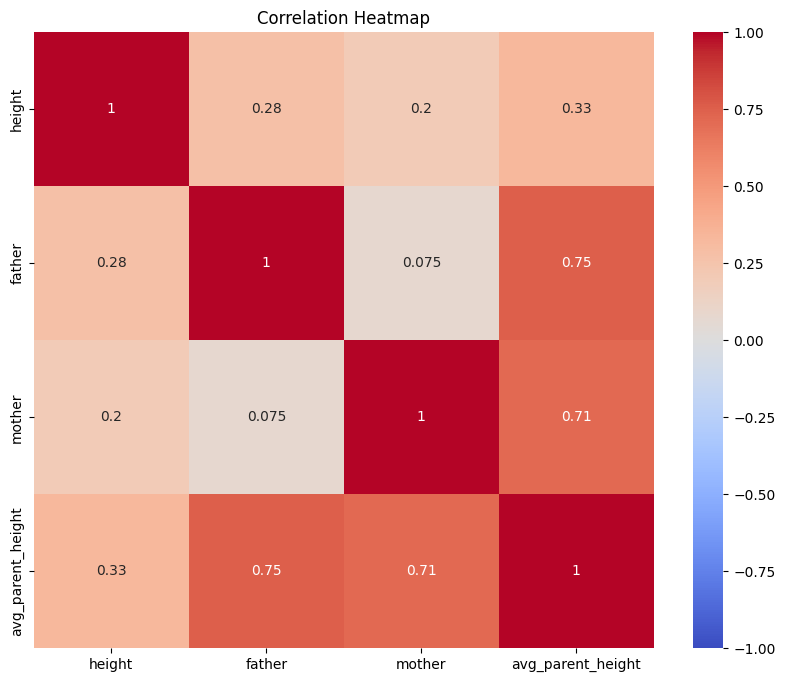

In [29]:
# prompt: Correlation coefficients of son's height

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df_filtered[df_filtered['gender'] == 1][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()



# Correlation coefficients of daughter's height

height               1.000000
avg_parent_height    0.541610
father               0.458515
mother               0.314607
Name: height, dtype: float64


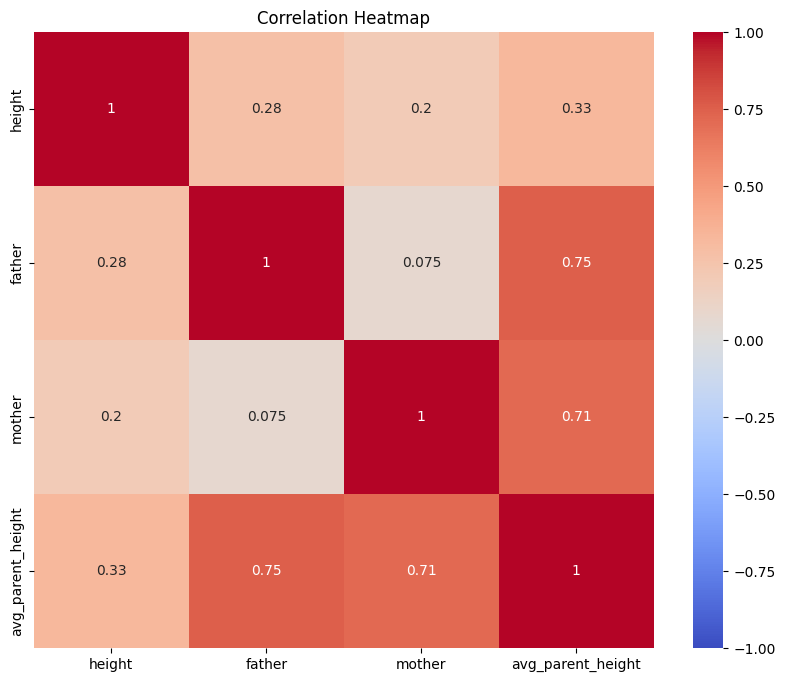

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations for sons only
correlations_sons = df_filtered[df_filtered['gender'] == 0][['height', 'father', 'mother', 'avg_parent_height']].corr()

# Print sorted correlations with 'height' for sons
print(correlations_sons['height'].sort_values(ascending=False))

# Create a heatmap chart
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# **Splitting Data**

# Original height data splitting

In [31]:
# prompt: split the data df_original into training and testing data

from sklearn.model_selection import train_test_split

# Separate features (independent variables) and target (dependent variable)
features = df_original[['father', 'mother']]
target = df_original['height']

# Split the data into training and testing sets
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train_org.shape)
print("X_test shape:", X_test_org.shape)
print("y_train shape:", y_train_org.shape)
print("y_test shape:", y_test_org.shape)


X_train shape: (712, 2)
X_test shape: (178, 2)
y_train shape: (712,)
y_test shape: (178,)


# Splitting data (before removing outliers)

In [32]:
# prompt: generate code to split tghe data into training and testing data before removing outliers

# Define features and target
features = df[['father', 'mother', 'gender', 'avg_parent_height']]
target = df['height']

# Split the data into training and testing sets
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", b_X_train.shape)
print("y_train shape:", b_y_train.shape)
print("X_test shape:", b_X_test.shape)
print("y_test shape:", b_y_test.shape)


X_train shape: (712, 4)
y_train shape: (712,)
X_test shape: (178, 4)
y_test shape: (178,)


# Splitting data (after removing outliers)

In [33]:
# prompt: genearete code to split data into trianing and tesing

from sklearn.model_selection import train_test_split

# Define features and target
features = df_filtered[['father', 'mother', 'gender', 'avg_parent_height']]
target = df_filtered['height']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (711, 4)
y_train shape: (711,)
X_test shape: (178, 4)
y_test shape: (178,)


# **Models** (for original data)

# Linear regression model

In [34]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression instead

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_org = model.predict(X_test_org)

# Print the predicted target values
print(predicted_target_org)

[67.29965235 67.15908834 68.11430162 67.15908834 66.71021648 64.46585716
 67.04725911 65.25177165 66.71021648 65.89712214 66.23260984 67.94500284
 66.00895137 69.37020988 65.33486611 66.42458545 65.6447289  66.09360076
 65.83965259 64.83007963 69.37020988 67.44021636 67.18782312 67.29965235
 66.26134461 69.2500712  67.29965235 67.22393438 66.26134461 66.1207806
 69.62866106 67.29965235 68.08556684 66.71021648 66.92106249 67.94500284
 67.28528496 65.61599412 66.71021648 67.32838712 65.65909629 64.46585716
 66.33162662 65.50416489 67.48176358 66.93542988 67.04725911 66.93542988
 66.14951538 67.29965235 65.89712214 68.85711395 66.03768615 68.30922531
 67.48176358 67.33576361 66.92106249 66.09360076 67.94500284 67.0616265
 69.37020988 67.15908834 66.79486587 67.29965235 66.51373785 66.93542988
 66.9769771  67.44021636 65.33486611 66.79486587 64.4083876  67.29965235
 67.94500284 64.21346392 67.08880634 66.93542988 69.37020988 66.71021648
 67.18782312 65.33486611 67.29965235 65.46106273 67.1

In [35]:
# prompt: generate code for what was the accuracy that i got

from sklearn.metrics import r2_score

# Calculate the R^2 score of the predictions
lr_accuracy_org = r2_score(y_test_org, predicted_target_org)

# Print the accuracy
print("Accuracy:", lr_accuracy_org)

Accuracy: 0.11584237747872983


# SVR Linear Model

In [36]:
# prompt: generate code for svr linear model

from sklearn.svm import SVR

# Create a Support Vector Regression (SVR) model with a linear kernel
model_svr_linear = SVR(kernel='linear')

# Train the model on the training data
model_svr_linear.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_svr_linear_org = model_svr_linear.predict(X_test_org)

# Print the predicted target values
print(predicted_target_svr_linear_org)

[67.05642488 66.89649314 67.9007503  66.89649314 66.50962958 64.5753118
 66.85182642 65.3043722  66.50962958 65.87350085 66.007501   67.62555354
 65.91816757 68.85905025 65.23377389 66.33327045 65.66890239 66.05576595
 65.6429708  64.82457697 68.85905025 67.21635662 67.01175816 67.05642488
 66.12276603 68.82144336 67.05642488 66.99504534 66.12276603 65.96283429
 69.12834105 67.05642488 67.78548528 66.50962958 66.74952719 67.62555354
 66.99879237 65.55363737 66.50962958 67.1716899  65.72653491 64.5753118
 66.2027319  65.50897065 67.18105747 66.80715971 66.85182642 66.80715971
 66.07809931 67.05642488 65.87350085 68.45691316 66.03343259 67.87481871
 67.18105747 67.03971206 66.74952719 66.05576595 67.62555354 66.90945893
 68.85905025 66.89649314 66.64722796 67.05642488 66.32736448 66.80715971
 66.77186055 67.21635662 65.23377389 66.64722796 64.34478175 67.05642488
 67.62555354 64.37071334 66.81652727 66.80715971 68.85905025 66.50962958
 67.01175816 65.23377389 67.05642488 65.33607312 66.8

In [37]:
# Calculate the R^2 score of the predictions
svr_accuracy_org = r2_score(y_test_org, predicted_target_svr_linear_org)

# Print the accuracy
print("Accuracy (SVR linear):", svr_accuracy_org)

Accuracy (SVR linear): 0.10940683201888834


# XGBoost Model

In [38]:
# prompt: generate code for xgboost model

from xgboost import XGBRegressor

# Create an XGBoost regressor model
model_xgb = XGBRegressor()

# Train the model on the training data
model_xgb.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_xgb_org = model_xgb.predict(X_test_org)

# Print the predicted target values
print(predicted_target_xgb_org)



[67.873245 67.518166 66.834175 67.518166 62.369953 64.332054 67.77574
 62.635853 62.369953 64.60051  64.39326  68.61605  65.510544 69.2991
 65.49255  71.34831  65.94842  69.25795  65.872025 64.5066   69.2991
 66.93436  66.46178  67.873245 65.40214  69.24652  67.873245 68.49648
 65.40214  64.71899  70.700066 67.873245 68.91817  62.369953 69.06957
 68.61605  68.113945 68.91104  62.369953 69.154686 63.75623  64.332054
 68.30035  65.72827  68.9775   68.18455  67.77574  68.18455  68.55086
 67.873245 64.60051  68.59197  64.899025 67.63471  68.9775   69.49433
 69.06957  69.25795  68.61605  65.12426  69.2991   67.518166 65.7098
 67.873245 68.65732  68.18455  64.548195 66.93436  65.49255  65.7098
 61.492844 67.873245 68.61605  63.6      68.04327  68.18455  69.2991
 62.369953 66.46178  65.49255  67.873245 70.61935  67.518166 64.50384
 66.43534  65.49255  64.52219  67.74114  65.74792  70.74586  62.70004
 65.8154   68.18455  65.44713  62.70004  66.753235 67.77574  63.6
 64.21085  65.49339  69.0026

In [39]:
# Calculate the R^2 score of the predictions
xgb_accuracy_org = r2_score(y_test_org, predicted_target_xgb_org)

# Print the accuracy
print("Accuracy (XGBoost):", xgb_accuracy_org)

Accuracy (XGBoost): -0.030703765619219725


# Light GBM Model

In [40]:
# prompt: generate code for light gbm model

import lightgbm as lgb

# Create a LightGBM regressor model
model_lgb = lgb.LGBMRegressor()

# Train the model on the training data
model_lgb.fit(X_train_org, y_train_org)

# Predict the target values for the test data
predicted_target_lgb_org = model_lgb.predict(X_test_org)

# Print the predicted target values
print(predicted_target_lgb_org)



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 2
[LightGBM] [Info] Start training from score 66.765028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [41]:
# Calculate the R^2 score of the predictions
lgb_accuracy_org = r2_score(y_test_org, predicted_target_lgb_org)

# Print the accuracy
print("Accuracy (LightGBM):", lgb_accuracy_org)

Accuracy (LightGBM): 0.06947058993626565


# MPH Model

In [42]:
# prompt: generate code for mph model by using training and testing dataframes

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor


# Define the MPH model
model_mph = MultiOutputRegressor(LinearRegression())

# Reshape y_train to have two dimensions
y_train_reshaped_org = y_train_org.values.reshape(-1, 1)

# Train the model on the training data using the reshaped target variable
model_mph.fit(X_train_org, y_train_reshaped_org)

# Predict the target values for the test data
predicted_target_mph_org = model_mph.predict(X_test_org)

# Print the predicted target values
print(predicted_target_mph_org)

[[67.29965235]
 [67.15908834]
 [68.11430162]
 [67.15908834]
 [66.71021648]
 [64.46585716]
 [67.04725911]
 [65.25177165]
 [66.71021648]
 [65.89712214]
 [66.23260984]
 [67.94500284]
 [66.00895137]
 [69.37020988]
 [65.33486611]
 [66.42458545]
 [65.6447289 ]
 [66.09360076]
 [65.83965259]
 [64.83007963]
 [69.37020988]
 [67.44021636]
 [67.18782312]
 [67.29965235]
 [66.26134461]
 [69.2500712 ]
 [67.29965235]
 [67.22393438]
 [66.26134461]
 [66.1207806 ]
 [69.62866106]
 [67.29965235]
 [68.08556684]
 [66.71021648]
 [66.92106249]
 [67.94500284]
 [67.28528496]
 [65.61599412]
 [66.71021648]
 [67.32838712]
 [65.65909629]
 [64.46585716]
 [66.33162662]
 [65.50416489]
 [67.48176358]
 [66.93542988]
 [67.04725911]
 [66.93542988]
 [66.14951538]
 [67.29965235]
 [65.89712214]
 [68.85711395]
 [66.03768615]
 [68.30922531]
 [67.48176358]
 [67.33576361]
 [66.92106249]
 [66.09360076]
 [67.94500284]
 [67.0616265 ]
 [69.37020988]
 [67.15908834]
 [66.79486587]
 [67.29965235]
 [66.51373785]
 [66.93542988]
 [66.97697

In [43]:
# Calculate the R^2 score of the predictions
mph_accuracy_org = r2_score(y_test_org, predicted_target_mph_org)

# Print the accuracy
print("Accuracy (MPH):", mph_accuracy_org)

Accuracy (MPH): 0.11584237747872983


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on test set
predicted_target_dt = dt_model.predict(X_test)

# Calculate MAPE
mape_dt = np.mean(np.abs((y_test - predicted_target_dt) / y_test)) * 100

# Calculate accuracy in percentage
accuracy_dt = 100 - mape_dt
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}%')


Decision Tree Accuracy: 97.25%


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
predicted_target_rf = rf_model.predict(X_test)

# Calculate MAPE
mape_rf = np.mean(np.abs((y_test - predicted_target_rf) / y_test)) * 100

# Calculate accuracy in percentage
accuracy_rf = 100 - mape_rf
print(f'Random Forest Accuracy: {accuracy_rf:.2f}%')


Random Forest Accuracy: 97.44%


# ANN model

In [50]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# ANN model
ann_model = Sequential()

# Adding input layer and first hidden layer
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Adding second hidden layer
ann_model.add(Dense(units=32, activation='relu'))

# Adding output layer
ann_model.add(Dense(units=1, activation='linear'))

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
ann_model.fit(X_train, y_train, epochs=50, batch_size=10)

# Predict on test set
predicted_target_ann = ann_model.predict(X_test)

# Reshape predictions to 1D if necessary
predicted_target_ann = predicted_target_ann.flatten()

# Calculate MAPE
mape_ann = np.mean(np.abs((y_test - predicted_target_ann) / y_test)) * 100

# Calculate accuracy in percentage
accuracy_ann = 100 - mape_ann
print(f'ANN Accuracy: {accuracy_ann:.2f}%')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1875.8534
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.5557
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2379
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.3711
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9175
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 10.8498
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11.2040
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8937
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9415
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6593
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.8864
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5895
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8933
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.2635
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.3902
Epoch 16/50
72/7

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ANN Accuracy: 97.20%


# **Models** (Before removing outliers)

# Linear refression model

In [51]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression instead

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_b = model.predict(b_X_test)

# Print the predicted target values
print(predicted_target_b)

[64.71034059 69.67909059 65.52284059 69.67909059 64.08534059 66.67909059
 64.42127809 62.42127809 69.18690309 68.23377809 63.60096559 65.42127809
 68.39002809 66.98377809 62.60877809 63.70252809 62.84315309 63.34315309
 63.18690309 67.13221559 66.98377809 64.84315309 69.65565309 64.71034059
 68.67909059 66.81971559 64.71034059 69.71034059 68.67909059 63.44471559
 72.35096559 69.81190309 65.54627809 69.18690309 69.37440309 65.42127809
 69.81971559 62.86659059 64.08534059 69.78065309 67.93690309 66.67909059
 68.74940309 67.81971559 64.92909059 69.36659059 69.52284059 64.26502809
 68.52284059 69.81190309 68.23377809 71.49940309 63.26502809 65.85877809
 64.92909059 69.86659059 64.27284059 68.44471559 65.42127809 64.40565309
 72.08534059 64.57752809 64.12440309 64.71034059 63.86659059 64.26502809
 64.35096559 64.84315309 62.60877809 64.12440309 66.74159059 69.81190309
 70.52284059 61.29627809 69.61659059 64.26502809 72.08534059 69.18690309
 69.65565309 62.60877809 64.71034059 62.74940309 69

In [52]:
# prompt: generate code for what was the accuracy that i got

from sklearn.metrics import r2_score

# Calculate the R^2 score of the predictions
lr_accuracy_before = r2_score(b_y_test, predicted_target_b)

# Print the accuracy
print("Accuracy:", lr_accuracy_before)


Accuracy: 0.7014300909729096


# SVR Linear model

In [53]:
# prompt: generate code for svr linear model

from sklearn.svm import SVR

# Create a Support Vector Regression (SVR) model with a linear kernel
model_svr_linear = SVR(kernel='linear')

# Train the model on the training data
model_svr_linear.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_svr_linear = model_svr_linear.predict(b_X_test)

# Print the predicted target values
print(predicted_target_svr_linear)



[64.84497227 69.91930304 65.6893071  69.91930304 64.19792115 66.8629312
 64.55126067 62.51367944 69.40990773 68.45074503 63.70692584 65.57005128
 68.60680082 67.18451068 62.68813522 63.83442724 62.94504685 63.45444215
 63.27555843 67.3126986  67.18451068 64.98262807 69.90090305 64.84497227
 68.90051243 67.01100931 64.84497227 69.96884537 68.90051243 63.55087004
 72.66356329 70.05695885 65.70770709 69.40990773 69.61639144 65.57005128
 70.06615884 62.96344684 64.19792115 70.03855886 68.14783343 66.8629312
 68.96934033 68.01937762 65.06985597 69.60719145 69.76324724 64.39520487
 68.74445663 70.05695885 68.45074503 71.79162848 63.37641426 66.01981868
 65.06985597 70.12490116 64.40440486 68.66642873 65.57005128 64.54206067
 72.39649726 64.70731646 64.25754906 64.84497227 63.98223745 64.39520487
 64.48243276 64.98262807 62.68813522 64.25754906 66.89973118 70.05695885
 70.78203786 61.35723302 69.85047514 64.39520487 72.39649726 69.40990773
 69.90090305 62.68813522 64.84497227 62.83499102 69.9

In [54]:
# Calculate the R^2 score of the predictions
svr_accuracy_before = r2_score(b_y_test, predicted_target_svr_linear)

# Print the accuracy
print("Accuracy (SVR linear):", svr_accuracy_before)

Accuracy (SVR linear): 0.7013408326034938


# XGBoost Model

In [55]:
# prompt: generate code for xgboost model

from xgboost import XGBRegressor

# Create an XGBoost regressor model
model_xgb = XGBRegressor()

# Train the model on the training data
model_xgb.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_xgb = model_xgb.predict(b_X_test)

# Print the predicted target values
print(predicted_target_xgb)



[64.86754  70.90752  66.19536  70.90752  60.53056  66.480835 64.88964
 59.01328  65.96812  66.66228  62.56577  65.48618  67.312744 68.16135
 61.01804  65.46384  63.421806 64.062454 64.97144  66.03079  68.16135
 66.402626 69.179695 64.86754  67.93723  69.22487  64.86754  70.99261
 67.93723  64.05567  74.737015 70.37622  65.51558  65.96812  71.028786
 65.48618  71.22932  63.888657 60.53056  71.424995 64.52803  66.480835
 69.73152  68.28524  64.34672  69.743164 68.97546  62.040794 71.25666
 70.37622  66.66228  70.44265  64.31382  65.003876 64.34672  69.49867
 67.36412  69.23703  65.48618  63.489193 72.72221  64.47001  62.395287
 64.86754  65.7301   62.040794 63.215473 66.402626 61.01804  62.395287
 64.569695 70.37622  70.571236 61.852837 68.65189  62.040794 72.72221
 65.96812  69.179695 61.01804  64.86754  65.07169  70.90752  62.936447
 70.506775 61.01804  63.98353  64.33227  64.43634  68.48275  66.495575
 63.168823 62.040794 67.12897  60.185223 70.98587  64.88964  66.0457
 67.96795  63.9

In [56]:
# Calculate the R^2 score of the predictions
xgb_accuracy_before = r2_score(b_y_test, predicted_target_xgb)

# Print the accuracy
print("Accuracy (XGBoost):", xgb_accuracy_before)

Accuracy (XGBoost): 0.6328539814624139


# Light GBM model

In [57]:
# prompt: generate code for light gbm model

import lightgbm as lgb

# Create a LightGBM regressor model
model_lgb = lgb.LGBMRegressor()

# Train the model on the training data
model_lgb.fit(b_X_train, b_y_train)

# Predict the target values for the test data
predicted_target_lgb = model_lgb.predict(b_X_test)

# Print the predicted target values
print(predicted_target_lgb)



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] Start training from score 66.765028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [58]:
# Calculate the R^2 score of the predictions
lgb_accuracy_before = r2_score(b_y_test, predicted_target_lgb)

# Print the accuracy
print("Accuracy (LightGBM):", lgb_accuracy_before)

Accuracy (LightGBM): 0.6911709032705733


# MPH model

In [59]:
# prompt: generate code for mph model by using training and testing dataframes

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# Load or define your training data here (replace with your actual data loading code)
# Example:
# X_train = ...  # Load your training features
# y_train = ...  # Load your training target variable

# Define the MPH model
model_mph = MultiOutputRegressor(LinearRegression())

# Reshape y_train to have two dimensions
b_y_train_reshaped = b_y_train.values.reshape(-1, 1)

# Train the model on the training data using the reshaped target variable
model_mph.fit(b_X_train, b_y_train_reshaped)

# Predict the target values for the test data
predicted_target_mph = model_mph.predict(b_X_test)

# Print the predicted target values
print(predicted_target_mph)

[[64.71034059]
 [69.67909059]
 [65.52284059]
 [69.67909059]
 [64.08534059]
 [66.67909059]
 [64.42127809]
 [62.42127809]
 [69.18690309]
 [68.23377809]
 [63.60096559]
 [65.42127809]
 [68.39002809]
 [66.98377809]
 [62.60877809]
 [63.70252809]
 [62.84315309]
 [63.34315309]
 [63.18690309]
 [67.13221559]
 [66.98377809]
 [64.84315309]
 [69.65565309]
 [64.71034059]
 [68.67909059]
 [66.81971559]
 [64.71034059]
 [69.71034059]
 [68.67909059]
 [63.44471559]
 [72.35096559]
 [69.81190309]
 [65.54627809]
 [69.18690309]
 [69.37440309]
 [65.42127809]
 [69.81971559]
 [62.86659059]
 [64.08534059]
 [69.78065309]
 [67.93690309]
 [66.67909059]
 [68.74940309]
 [67.81971559]
 [64.92909059]
 [69.36659059]
 [69.52284059]
 [64.26502809]
 [68.52284059]
 [69.81190309]
 [68.23377809]
 [71.49940309]
 [63.26502809]
 [65.85877809]
 [64.92909059]
 [69.86659059]
 [64.27284059]
 [68.44471559]
 [65.42127809]
 [64.40565309]
 [72.08534059]
 [64.57752809]
 [64.12440309]
 [64.71034059]
 [63.86659059]
 [64.26502809]
 [64.35096

In [61]:
# Calculate the R^2 score of the predictions
mph_accuracy_before = r2_score(b_y_test, predicted_target_mph)

# Print the accuracy
print("Accuracy (MPH):", mph_accuracy_before)

Accuracy (MPH): 0.7014300909729096


# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Decision Tree model (before outlier removal)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# ----- Metrics Before Outlier Removal -----

# Mean Squared Error (MSE) and R²
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_dt = np.mean(np.abs((y_test - dt_pred) / y_test)) * 100

# Calculate accuracy in percentage
dt_accuracy = 100 - mape_dt

# Display results
print(f'Decision Tree (before outlier removal) - MSE: {dt_mse}, R²: {dt_r2}, Accuracy: {dt_accuracy:.2f}%')


Decision Tree (before outlier removal) - MSE: 5.502322258953362, R²: 0.5946606604690576, Accuracy: 97.25%


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Random Forest model (before outlier removal)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# ----- Metrics Before Outlier Removal -----

# Mean Squared Error (MSE) and R²
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_rf = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

# Calculate accuracy in percentage
rf_accuracy = 100 - mape_rf

# Display results
print(f'Random Forest (before outlier removal) - MSE: {rf_mse}, R²: {rf_r2}, Accuracy: {rf_accuracy:.2f}%')



Random Forest (before outlier removal) - MSE: 5.0300803507239475, R²: 0.6294492850119164, Accuracy: 97.44%


# ANN model

In [67]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ANN model (before outlier removal)
ann_model = MLPRegressor(random_state=42, max_iter=1000)
ann_model.fit(X_train, y_train)
ann_pred = ann_model.predict(X_test)

# ----- Metrics Before Outlier Removal -----

# Mean Squared Error (MSE) and R²
ann_mse = mean_squared_error(y_test, ann_pred)
ann_r2 = r2_score(y_test, ann_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_ann = np.mean(np.abs((y_test - ann_pred) / y_test)) * 100

# Calculate accuracy in percentage
ann_accuracy = 100 - mape_ann

# Display results
print(f'ANN (before outlier removal) - MSE: {ann_mse}, R²: {ann_r2}, Accuracy: {ann_accuracy:.2f}%')


ANN (before outlier removal) - MSE: 4.417337572236706, R²: 0.6745881811807528, Accuracy: 97.48%


# **Models** (After removing outliers)

# Linear regression model

In [68]:

# prompt: generate code for linear regression

from sklearn.linear_model import LinearRegression  # Import LinearRegression instead

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target values for the test data
predicted_target = model.predict(X_test)

# Print the predicted target values
print(predicted_target)

[64.6546853 64.5296853 65.5609353 69.5921853 64.0296853 66.6703103
 64.4046853 62.5140603 69.0921853 68.2171853 62.6546853 65.3734353
 68.3109353 66.9046853 68.6546853 68.6859353 62.8734353 63.3734353
 61.3265603 67.8421853 66.9046853 64.8109353 69.6234353 69.7171853
 68.5921853 66.8109353 64.6546853 64.5609353 68.5921853 68.3109353
 72.2796853 69.6234353 65.4984353 69.0921853 64.2796853 65.3734353
 64.6859353 62.8421853 64.0296853 69.7484353 67.9671853 68.0296853
 62.9671853 66.9046853 69.7484353 69.3421853 69.4671853 64.2796853
 63.5921853 69.7171853 68.2171853 71.4671853 63.3109353 65.7484353
 64.8734353 69.7484353 69.1859353 68.4359353 65.3734353 64.4046853
 71.9671853 69.5921853 69.1859353 64.6546853 63.5921853 64.2796853
 64.3109353 64.8109353 62.5140603 64.1234353 66.5921853 64.6546853
 70.4359353 61.3265603 69.4984353 64.2796853 71.9671853 68.5921853
 69.6234353 68.1703103 64.6546853 62.6546853 69.5921853 63.9359353
 70.2796853 67.7171853 67.5921853 63.2796853 67.4984353 66.342

In [69]:
# prompt: generate code for what was the accuracy that i got

from sklearn.metrics import r2_score

# Calculate the R^2 score of the predictions
lr_accuracy_after = r2_score(y_test, predicted_target)

# Print the accuracy
print("Accuracy:", lr_accuracy_after)


Accuracy: 0.6820925338610375


# SVR linear model

In [70]:
# prompt: generate code for svr linear model

from sklearn.svm import SVR

# Create a Support Vector Regression (SVR) model with a linear kernel
model_svr_linear = SVR(kernel='linear')

# Train the model on the training data
model_svr_linear.fit(X_train, y_train)

# Predict the target values for the test data
predicted_target_svr_linear = model_svr_linear.predict(X_test)

# Print the predicted target values
print(predicted_target_svr_linear)



[64.69052047 64.51402467 65.6734734  69.79313876 64.01032217 66.77092377
 64.41355074 62.42319281 69.28943626 68.4082901  62.54945164 65.42095574
 68.50876403 67.02275634 68.83597073 68.91199259 62.85220627 63.35590877
 61.21483994 68.00506153 67.02275634 64.86701627 69.86916063 69.96963456
 68.78573376 66.9198372  64.69052047 64.60742955 68.78573376 68.50876403
 72.61440589 69.88654364 65.59745153 69.28943626 64.27506587 65.42095574
 64.65250954 62.77618441 64.01032217 70.04565642 68.16933129 68.19378337
 62.91466927 66.97187164 69.93162363 69.59219089 69.69266483 64.3130768
 63.55685664 69.96963456 68.4082901  71.74548576 63.3056718  65.7983994
 64.8792423  69.98701758 69.41569509 68.63502286 65.42095574 64.45156167
 72.30187043 69.79313876 69.41569509 64.69052047 63.55685664 64.3130768
 64.32530284 64.86701627 62.42319281 64.136581   66.61888004 64.69052047
 70.70006983 61.21483994 69.70489086 64.3130768  72.30187043 68.78573376
 69.86916063 68.2942573  64.69052047 62.56167768 69.79

In [71]:
# Calculate the R^2 score of the predictions
svr_accuracy_after = r2_score(y_test, predicted_target_svr_linear)

# Print the accuracy
print("Accuracy (SVR linear):", svr_accuracy_after)

Accuracy (SVR linear): 0.6877738139057442


# XGBoost model

In [72]:
# prompt: generate code for xgboost model

from xgboost import XGBRegressor

# Create an XGBoost regressor model
model_xgb = XGBRegressor()

# Train the model on the training data
model_xgb.fit(X_train, y_train)

# Predict the target values for the test data
predicted_target_xgb = model_xgb.predict(X_test)

# Print the predicted target values
print(predicted_target_xgb)



[64.29986  64.208855 66.194305 70.70251  60.589123 66.67055  65.94956
 61.504234 67.55899  66.62002  63.93889  65.48991  67.16807  68.15749
 70.91161  70.48996  63.39261  65.02     61.831665 69.00145  68.15749
 66.3806   69.1633   69.6151   67.96466  69.23423  64.29986  65.04413
 67.96466  67.16807  74.747986 69.3829   65.50952  67.55899  63.58264
 65.48991  64.09408  63.68542  60.589123 71.425545 71.409    68.36891
 63.460278 67.962616 71.23344  69.74536  68.82713  62.02829  63.25197
 69.6151   66.62002  70.47391  64.29589  65.00565  64.33272  68.3758
 66.76684  69.21895  65.48991  63.48286  72.736435 70.70251  66.76684
 64.29986  63.25197  62.02829  64.42954  66.3806   61.504234 62.543278
 64.21672  64.29986  70.573875 61.831665 68.66615  62.02829  72.736435
 67.96466  69.1633   71.51561  64.29986  63.52554  70.70251  63.56109
 72.50104  67.17917  68.47681  63.476444 67.527885 68.492676 66.82923
 63.352097 62.02829  63.25197  65.00789  70.925354 65.94956  66.04302
 67.962616 68.66615

In [73]:
# Calculate the R^2 score of the predictions
xgb_accuracy_after = r2_score(y_test, predicted_target_xgb)

# Print the accuracy
print("Accuracy (XGBoost):", xgb_accuracy_after)

Accuracy (XGBoost): 0.6032896557410383


# Light GBM model

In [74]:
# prompt: generate code for light gbm model

import lightgbm as lgb

# Create a LightGBM regressor model
model_lgb = lgb.LGBMRegressor()

# Train the model on the training data
model_lgb.fit(X_train, y_train)

# Predict the target values for the test data
predicted_target_lgb = model_lgb.predict(X_test)

# Print the predicted target values
print(predicted_target_lgb)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 4
[LightGBM] [Info] Start training from score 66.685935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [75]:
# Calculate the R^2 score of the predictions
lgb_accuracy_after = r2_score(y_test, predicted_target_lgb)

# Print the accuracy
print("Accuracy (LightGBM):", lgb_accuracy_after)

Accuracy (LightGBM): 0.6581470390951012


# MPH model

In [76]:
# prompt: generate code for mph model by using training and testing dataframes

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# Load or define your training data here (replace with your actual data loading code)
# Example:
# X_train = ...  # Load your training features
# y_train = ...  # Load your training target variable

# Define the MPH model
model_mph = MultiOutputRegressor(LinearRegression())

# Reshape y_train to have two dimensions
y_train_reshaped = y_train.values.reshape(-1, 1)

# Train the model on the training data using the reshaped target variable
model_mph.fit(X_train, y_train_reshaped)

# Predict the target values for the test data
predicted_target_mph = model_mph.predict(X_test)

# Print the predicted target values
print(predicted_target_mph)

[[64.6546853]
 [64.5296853]
 [65.5609353]
 [69.5921853]
 [64.0296853]
 [66.6703103]
 [64.4046853]
 [62.5140603]
 [69.0921853]
 [68.2171853]
 [62.6546853]
 [65.3734353]
 [68.3109353]
 [66.9046853]
 [68.6546853]
 [68.6859353]
 [62.8734353]
 [63.3734353]
 [61.3265603]
 [67.8421853]
 [66.9046853]
 [64.8109353]
 [69.6234353]
 [69.7171853]
 [68.5921853]
 [66.8109353]
 [64.6546853]
 [64.5609353]
 [68.5921853]
 [68.3109353]
 [72.2796853]
 [69.6234353]
 [65.4984353]
 [69.0921853]
 [64.2796853]
 [65.3734353]
 [64.6859353]
 [62.8421853]
 [64.0296853]
 [69.7484353]
 [67.9671853]
 [68.0296853]
 [62.9671853]
 [66.9046853]
 [69.7484353]
 [69.3421853]
 [69.4671853]
 [64.2796853]
 [63.5921853]
 [69.7171853]
 [68.2171853]
 [71.4671853]
 [63.3109353]
 [65.7484353]
 [64.8734353]
 [69.7484353]
 [69.1859353]
 [68.4359353]
 [65.3734353]
 [64.4046853]
 [71.9671853]
 [69.5921853]
 [69.1859353]
 [64.6546853]
 [63.5921853]
 [64.2796853]
 [64.3109353]
 [64.8109353]
 [62.5140603]
 [64.1234353]
 [66.5921853]
 [64.6

In [77]:
# Calculate the R^2 score of the predictions
mph_accuracy_after = r2_score(y_test, predicted_target_mph)

# Print the accuracy
print("Accuracy (MPH):", mph_accuracy_after)

Accuracy (MPH): 0.6820925338610375


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Decision Tree model (after outlier removal)
dt_model_clean = DecisionTreeRegressor(random_state=42)
dt_model_clean.fit(X_train, y_train)
dt_pred_clean = dt_model_clean.predict(X_test)

# ----- Metrics After Outlier Removal -----

# Mean Squared Error (MSE) and R²
dt_mse_clean = mean_squared_error(y_test, dt_pred_clean)
dt_r2_clean = r2_score(y_test, dt_pred_clean)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_dt_clean = np.mean(np.abs((y_test - dt_pred_clean) / y_test)) * 100

# Calculate accuracy in percentage
dt_accuracy_clean = 100 - mape_dt_clean

# Display results
print(f'Decision Tree (after outlier removal) - MSE: {dt_mse_clean}, R²: {dt_r2_clean}, Accuracy: {dt_accuracy_clean:.2f}%')


Decision Tree (after outlier removal) - MSE: 5.502322258953362, R²: 0.5946606604690576, Accuracy: 97.25%


# Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Random Forest model (after outlier removal)
rf_model_clean = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_clean.fit(X_train, y_train)
rf_pred_clean = rf_model_clean.predict(X_test)

# ----- Metrics After Outlier Removal -----

# Mean Squared Error (MSE) and R²
rf_mse_clean = mean_squared_error(y_test, rf_pred_clean)
rf_r2_clean = r2_score(y_test, rf_pred_clean)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_rf_clean = np.mean(np.abs((y_test - rf_pred_clean) / y_test)) * 100

# Calculate accuracy in percentage
rf_accuracy_clean = 100 - mape_rf_clean

# Display results
print(f'Random Forest (after outlier removal) - MSE: {rf_mse_clean}, R²: {rf_r2_clean}, Accuracy: {rf_accuracy_clean:.2f}%')


Random Forest (after outlier removal) - MSE: 5.0300803507239475, R²: 0.6294492850119164, Accuracy: 97.44%


# ANN model


In [85]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ANN model (after outlier removal)
ann_model_clean = MLPRegressor(random_state=42, max_iter=1000)
ann_model_clean.fit(X_train, y_train)
ann_pred_clean = ann_model_clean.predict(X_test)

# ----- Metrics After Outlier Removal -----

# Mean Squared Error (MSE) and R²
ann_mse_clean = mean_squared_error(y_test, ann_pred_clean)
ann_r2_clean = r2_score(y_test, ann_pred_clean)

# Calculate MAPE (Mean Absolute Percentage Error)
mape_ann_clean = np.mean(np.abs((y_test - ann_pred_clean) / y_test)) * 100

# Calculate accuracy in percentage
ann_accuracy_clean = 100 - mape_ann_clean

# Display results
print(f'ANN (after outlier removal) - MSE: {ann_mse_clean}, R²: {ann_r2_clean}, Accuracy: {ann_accuracy_clean:.2f}%')


ANN (after outlier removal) - MSE: 4.417337572236706, R²: 0.6745881811807528, Accuracy: 97.48%


In [88]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model (original data)
rf_model_original = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_original.fit(X_train, y_train)
rf_pred_original = rf_model_original.predict(X_test)

# Metrics for original data
rf_mse_original = mean_squared_error(y_test, rf_pred_original)
rf_r2_original = r2_score(y_test, rf_pred_original)
mape_rf_original = np.mean(np.abs((y_test - rf_pred_original) / y_test)) * 100
rf_accuracy_original = 100 - mape_rf_original

# Print results
print(f'Random Forest (original data) - MSE: {rf_mse_original}, R²: {rf_r2_original}, Accuracy: {rf_accuracy_original:.2f}%')

# Random Forest model (before outlier removal)
rf_model_before = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_before.fit(X_train, y_train)
rf_pred_before = rf_model_before.predict(X_test)

# Metrics before outlier removal
rf_mse_before = mean_squared_error(y_test, rf_pred_before)
rf_r2_before = r2_score(y_test, rf_pred_before)
mape_rf_before = np.mean(np.abs((y_test - rf_pred_before) / y_test)) * 100
rf_accuracy_before = 100 - mape_rf_before

# Print results
print(f'Random Forest (before outlier removal) - MSE: {rf_mse_before}, R²: {rf_r2_before}, Accuracy: {rf_accuracy_before:.2f}%')

# Random Forest model (after outlier removal)
rf_model_after = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_after.fit(X_train, y_train)
rf_pred_after = rf_model_after.predict(X_test)

# Metrics after outlier removal
rf_mse_after = mean_squared_error(y_test, rf_pred_after)
rf_r2_after = r2_score(y_test, rf_pred_after)
mape_rf_after = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
rf_accuracy_after = 100 - mape_rf_after

# Print results
print(f'Random Forest (after outlier removal) - MSE: {rf_mse_after}, R²: {rf_r2_after}, Accuracy: {rf_accuracy_after:.2f}%')


Random Forest (original data) - MSE: 5.0300803507239475, R²: 0.6294492850119164, Accuracy: 97.44%
Random Forest (before outlier removal) - MSE: 5.0300803507239475, R²: 0.6294492850119164, Accuracy: 97.44%
Random Forest (after outlier removal) - MSE: 5.0300803507239475, R²: 0.6294492850119164, Accuracy: 97.44%


# **Comparing results of original data, before and after removing outliers**

# Model Accuracies original data, before and after removing outliers

In [86]:
# prompt: Regression results on child’s height before and after outlier removal were compared for each model above generated

import pandas as pd
from tabulate import tabulate
# Create a table to compare the R^2 scores of each model before and after outlier removal
models = ['Linear Regression', 'SVR (linear)', 'XGBoost', 'LightGBM', 'MPH','Decision Tree', 'Random Forest', 'ANN model']
accuracy_org = [lr_accuracy_org, svr_accuracy_org, xgb_accuracy_org, lgb_accuracy_org, mph_accuracy_org,accuracy_dt,accuracy_rf,accuracy_ann]
accuracy_before = [lr_accuracy_before, svr_accuracy_before, xgb_accuracy_before, lgb_accuracy_before, mph_accuracy_before,dt_accuracy,rf_accuracy,ann_accuracy]
accuracy_after = [lr_accuracy_after, svr_accuracy_after, xgb_accuracy_after, lgb_accuracy_after, mph_accuracy_after,dt_accuracy_clean,rf_accuracy_clean,ann_accuracy_clean]
table_data = []
for model, acc_org, acc_before, acc_after in zip(models, accuracy_org, accuracy_before, accuracy_after):
    table_data.append([
        model,
        f"{acc_org:.4f}",
        f"{acc_before:.4f}",
        f"{acc_after:.4f}"
    ])

# Define headers
headers = ["Model", "Accuracy on original data", "Accuracy Before Outlier Removal", "Accuracy After Outlier Removal"]

# Print the table
print("Model Accuracy Comparison\n")
print(tabulate(table_data, headers=headers, tablefmt='pretty'))


Model Accuracy Comparison

+-------------------+---------------------------+---------------------------------+--------------------------------+
|       Model       | Accuracy on original data | Accuracy Before Outlier Removal | Accuracy After Outlier Removal |
+-------------------+---------------------------+---------------------------------+--------------------------------+
| Linear Regression |          0.1158           |             0.7014              |             0.6821             |
|   SVR (linear)    |          0.1094           |             0.7013              |             0.6878             |
|      XGBoost      |          -0.0307          |             0.6329              |             0.6033             |
|     LightGBM      |          0.0695           |             0.6912              |             0.6581             |
|        MPH        |          0.1158           |             0.7014              |             0.6821             |
|   Decision Tree   |          97.249

# Regression results - Original data, before and after removing outliers

In [89]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

rmse_org = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test_org, predicted_target_org)),
    'SVR (linear)': np.sqrt(mean_squared_error(y_test_org, predicted_target_svr_linear_org)),
    'XGBoost': np.sqrt(mean_squared_error(y_test_org, predicted_target_xgb_org)),
    'LightGBM': np.sqrt(mean_squared_error(y_test_org, predicted_target_lgb_org)),
    'MPH': np.sqrt(mean_squared_error(y_test_org, predicted_target_mph_org))
}
# Calculate RMSE for each model before outlier removal
rmse_before = {
    'Linear Regression': np.sqrt(mean_squared_error(b_y_test, predicted_target_b)),
    'SVR (linear)': np.sqrt(mean_squared_error(b_y_test, predicted_target_svr_linear)),
    'XGBoost': np.sqrt(mean_squared_error(b_y_test, predicted_target_xgb)),
    'LightGBM': np.sqrt(mean_squared_error(b_y_test, predicted_target_lgb)),
    'MPH': np.sqrt(mean_squared_error(b_y_test, predicted_target_mph))
}

# Calculate RMSE for each model after outlier removal
rmse_after = {
    'Linear Regression': np.sqrt(mean_squared_error(y_test, predicted_target)),
    'SVR (linear)': np.sqrt(mean_squared_error(y_test, predicted_target_svr_linear)),
    'XGBoost': np.sqrt(mean_squared_error(y_test, predicted_target_xgb)),
    'LightGBM': np.sqrt(mean_squared_error(y_test, predicted_target_lgb)),
    'MPH': np.sqrt(mean_squared_error(y_test, predicted_target_mph))
}

# Convert dictionaries to lists for consistency
rmse_org_list = list(rmse_org.values())
rmse_before_list = list(rmse_before.values())
rmse_after_list = list(rmse_after.values())


table_data = []
models = list(rmse_before.keys())
for model in models:
    table_data.append([
        model,
        f"{rmse_org[model]:.2f}",
        f"{rmse_before[model]:.2f}",
        f"{rmse_after[model]:.2f}"
    ])

# Define headers
headers = ["Model", "Original data (RMSE)", "Before Outlier Removal (RMSE)", "After Outlier Removal (RMSE)"]

# Print the table
print("Regression results (RMSE)\n")
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

Regression results (RMSE)

+-------------------+----------------------+-------------------------------+------------------------------+
|       Model       | Original data (RMSE) | Before Outlier Removal (RMSE) | After Outlier Removal (RMSE) |
+-------------------+----------------------+-------------------------------+------------------------------+
| Linear Regression |         3.47         |             2.01              |             2.08             |
|   SVR (linear)    |         3.48         |             3.13              |             2.06             |
|      XGBoost      |         3.74         |             3.18              |             2.32             |
|     LightGBM      |         3.56         |             3.12              |             2.15             |
|        MPH        |         3.47         |             3.10              |             2.08             |
+-------------------+----------------------+-------------------------------+------------------------------+
